In [1]:
import h5py    
import numpy as np    
from scipy import ndimage
import nrrd

filename = 'fullvol_pixels_maps/volume_fullvol_pixels_maps.h5'
f = h5py.File(filename, 'r')
# List all groups
list(f.keys())


['axon', 'background', 'blood_vessel', 'cell_body']

In [2]:
# axons
a_group_key = list(f.keys())[0]
data = list(f[a_group_key])
vol_sz = np.shape(data)
fullvol = np.zeros(vol_sz)

for i in range(0,720):
    data1 = np.where(data[i] > 0, 1, 0)
    fullvol[i,:,:] = data1

print('Finished with axons')


## vessels
#a_group_key = list(f.keys())[2]
#data = list(f[a_group_key])
#vol_sz = np.shape(data)
#for i in range(0,720):
#    data1 = np.where(data[i] > 0, 2, 0)
#    fullvol[i,:,:] = fullvol[i,:,:] + data1

#print('Finished with vessels')

# cells
a_group_key = list(f.keys())[3]
data = list(f[a_group_key])
for i in range(0,720):
    data1 = np.where(data[i] > 0, 3, 0)
    fullvol[i,:,:] = fullvol[i,:,:] + data1

print('Finished with cells')

# background
a_group_key = list(f.keys())[1]
data = list(f[a_group_key])
for i in range(0,720):
    data1 = np.where(data[i] > 0, 4, 0)
    fullvol[i,:,:] = fullvol[i,:,:] + data1

print('Finished with background')


Finished with axons
Finished with cells
Finished with background


In [3]:
#del data 
#del data1 
#del f
#np.unique(fullvol)
import scipy
dsz = 4
fullvol2 = np.uint8(np.zeros( [vol_sz[0]//dsz, vol_sz[1]//dsz, vol_sz[2]//dsz]))
count=0
for i in range(0,720,dsz):
    fullvol2[count,:,:] = scipy.misc.imresize(np.squeeze(fullvol[i,:,:]), int(100//dsz) , interp='nearest')
    count += 1                                         
                                   

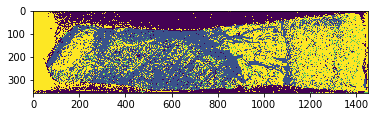

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
#plt.imshow(scipy.misc.imresize(np.squeeze(fullvol[200,:,:]), 50, interp='nearest'))
plt.imshow(fullvol2[111,:,:])

In [5]:
fullvol2 = np.uint8(fullvol2)
blankvol = np.uint8(np.zeros(np.shape(fullvol2)))

In [6]:
import imageio

#fullvol = np.uint8(fullvol)
#for i in range(0,int(720//dsz)):
for i in range(30,111):
    imageio.imwrite('fullvol_outtiffs/VS0172_segmented_outputs_' + str(i) + '.tiff', np.squeeze(fullvol2[i,:,:]))
    imageio.imwrite('blankvol_outtiffs/VS0172_blank_vol_' + str(i) + '.tiff', np.squeeze(blankvol[i,:,:]))

In [91]:
# write blank nrrd file
#nrrd.write('VS0172_blankvol.nrrd',blankvol)

# write fullvol nrrd file
#nrrd.write('VS0172_fullvol_axon_cell_vessels.nrrd',fullvol2)